# Tema 5: Evaluación de clasificadores
## Métricas de evaluación en Python

La evaluación de cualquier modelo de ML es fundamental. En el caso de los clasificadores (modelos de ML centrados en la tarea de clasificar), esto se hace observando si cumple su propósito, es decir si asigna o no las clases de manera correcta a cada instancia de datos.

La manera habitual de mostrar esta informacion es mediante una matriz de confusión. Una matriz de confusión para un clasificador binario es un array 2x2 donde las filas se corresponden con los clases verdaderas y las columnas se corresponde con las clases predichas. _el orden de puede cambiar_
Y en cada celda de la matriz se contabilizan los resultados de la clasificación. Tendremos cuatro tipos de resultados:
- Verdaderos positivos (TP): se trata de las clasificaciones correctas etiquetadas como positivas y que realmente corresponden a la clase positiva.
- Verdaderos negativos (TN): se trata de las clasificaciones correctas etiquetadas como negativas y que realmente corresponden a la clase negativa.
- Falsos positivos (FP): etiquetados como positivos pero que realmente pertenecen a la clase negativa.
- Falsos negativos (FN): etiquetados como negativos pero que realmente pertenecen a la clase positiva.


Es muy importante interpretar la matriz de confusión en base a la clase que tomamos como positiva y la clase que tomamos como negativa.

En Python usaremos el módulo metrics para calcular estos valores. En particular, la función https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html nos devuelve la matriz de confusión de un clasificador a partir de los y_real, y_pred.


In [18]:
from sklearn.metrics import confusion_matrix

y_real = ['gato', 'perro', 'gato', 'gato','perro', 'gato']
y_pred = ['perro', 'perro', 'gato', 'gato','perro', 'gato']

confusion_matrix(y_real, y_pred)


array([[3, 1],
       [0, 2]])

In [19]:
tn, fp, fn, tp = confusion_matrix(y_real, y_pred).ravel()

In [20]:
(tn, fp, fn, tp)

(np.int64(3), np.int64(1), np.int64(0), np.int64(2))

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

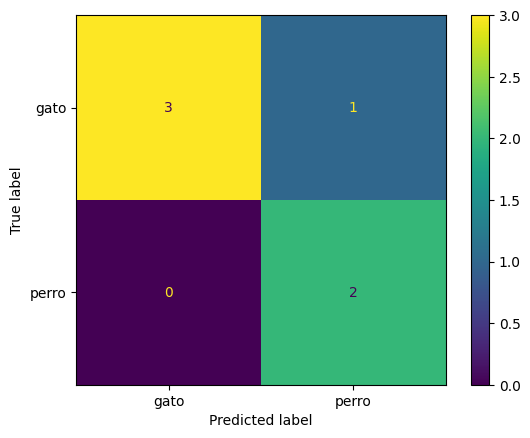

In [22]:
ConfusionMatrixDisplay.from_predictions(y_real, y_pred)

In [23]:
from sklearn.metrics import classification_report
# Mostrar precision and recall, junto con el resto de métricas
print(classification_report(y_real, y_pred, digits=3))

              precision    recall  f1-score   support

        gato      1.000     0.750     0.857         4
       perro      0.667     1.000     0.800         2

    accuracy                          0.833         6
   macro avg      0.833     0.875     0.829         6
weighted avg      0.889     0.833     0.838         6



In [24]:
from sklearn import metrics

precision = metrics.precision_score(y_real, y_pred, pos_label='gato')

recall = metrics.recall_score(y_real, y_pred, pos_label='gato')

accuracy = metrics.accuracy_score(y_real, y_pred)

f1 = metrics.f1_score(y_real, y_pred, pos_label='gato')

In [25]:
(accuracy, precision, recall, f1)

(0.8333333333333334, 1.0, 0.75, 0.8571428571428571)

**ROC**

/Users/josejp/Documents/2025/1_UNIR/Semenstre_1/Tecnicas de Aprendizaje Automatico/Trabajos/.venv/lib/python3.13/site-packages/sklearn/utils/_plotting.py:385: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


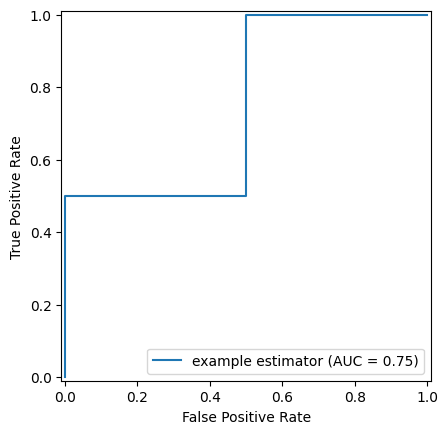

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
y = np.array([0, 0, 1, 1])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

In [27]:
# Codificar las categorías en valores numéricos
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_real_encoded = label_encoder.fit_transform(y_real)
y_pred_encoded = label_encoder.transform(y_pred)

/Users/josejp/Documents/2025/1_UNIR/Semenstre_1/Tecnicas de Aprendizaje Automatico/Trabajos/.venv/lib/python3.13/site-packages/sklearn/utils/_plotting.py:385: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


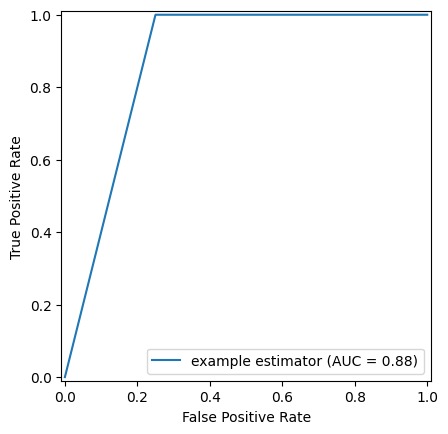

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_real_encoded, y_pred_encoded)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

# Evaluación de algoritmos de clasificación multiclase
En el siguiente notebook vamos a desarrollar un ejemplo de cómo aplicar la matriz de confusión y las métricas derivadas a un problema de clasificación multiclase.

En los problemas de clasificación binaria habitualmente se centran en una clase positiva que queremos detectar (e.g: detección de spam). Por el contrario, en un problema típico de clasificación de multiclase, necesitamos categorizar cada muestra en 1 de N clases diferentes.
Supongamos que tenemos una colección de fotos. Cada foto muestra un animal: un gato, un pez o una gallina. Nuestro clasificador necesita predecir qué animal se muestra en cada foto. Este es un problema de clasificación con N = 3 clases.

Veamos una matriz de confusión de muestra que se produce después de clasificar 25 fotos:

De manera similar a la clasificación binaria, podemos definir precisión y recall para cada una de las clases.

Por ejemplo, la precisión para la clase Gato es el número de fotos Gato predichas correctamente (4) de todas las fotos Gato predichas (4+6+3), lo que equivale a 4/13 = 30.7 %. ¡Así que solo 1/3 de las fotos que nuestro predictor clasifica como gatos son en realidad gatos!

In [29]:
# para Gato
tp = 4
fp = 6 +3
precision = tp / (tp + fp)

In [30]:
precision

0.3076923076923077

Por otro lado, el recall de Gato es el número de fotos de Gato predichas correctamente (4) de la cantidad de fotos de Gato reales (4 + 1 + 1 = 6), que es 4/6 = 66,7%. Esto significa que nuestro clasificador clasificó 2/3 de las fotos de gatos como Gato.

In [31]:
# para gato
fn = 1 + 1
recall = tp / (tp + fn)

print("Recall: ", recall)

Recall:  0.6666666666666666


In [32]:
# para gato

f1 = (2* precision * recall) / (recall + precision)

print("F measure; ",f1)

F measure;  0.42105263157894735


De igual manera podemos calcular los valores de precision y recall para el resto de clases.

En Python encontramos en la libreria scikit funciones para obtener los resultados de un clasificador multiclase.
sklearn.metrics.classification_report. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [33]:
from sklearn import metrics

# Constants
C="Gato"
F="Pez"
H="Gallina"

# valores Reales
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
# valores Predichos
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

# Mostrar confusion matrix
print(metrics.confusion_matrix(y_true, y_pred))

# Mostrar precision and recall, junto con el resto de métricas
print(metrics.classification_report(y_true, y_pred, digits=3))

[[6 3 0]
 [1 4 1]
 [2 6 2]]
              precision    recall  f1-score   support

     Gallina      0.667     0.667     0.667         9
        Gato      0.308     0.667     0.421         6
         Pez      0.667     0.200     0.308        10

    accuracy                          0.480        25
   macro avg      0.547     0.511     0.465        25
weighted avg      0.581     0.480     0.464        25

